In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gmm_em import *

In [2]:
z = np.array([.4, .6])
mus = np.array([[-2, -2], [2, -3]])
covs = np.array([[[1, 0], [0, .2]], [[1, 0], [0, .1]]])

In [3]:
colors = ['b', 'r']

In [4]:
X1 = np.empty((0, 2))
X2 = np.empty((0, 2))
for i in range(10):
    z_k = np.random.choice(np.arange(len(z)), p=z)
    if z_k == 0:
        X1 = np.vstack([X1, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])
    else:
        X2 = np.vstack([X2, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])

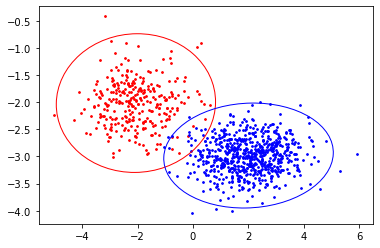

In [5]:
x1, y1 = X1.T
x2, y2 = X2.T
ax = plt.gca()
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)

### Initialize mean and covariance and pi

In [6]:
zc = np.array([.7, .3])
mc = np.array([[-4, -6], [4, 0]])


cc = np.array([[[.2, 0], [0, .2]], [[.2, 0], [0, .2]]])

In [7]:
X = np.vstack([X1, X2])
N = len(X)
K = len(zc)

In [8]:
X1_c = np.empty((0, 2))
X2_c = np.empty((0, 2))
zc = np.reshape(zc, (1, 2))[0]
for i in range(10):
    z_k = np.random.choice(np.arange(len(zc)), p=zc)
    if z_k == 0:
        X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    else:
        X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])

x1_c, y1_c = X1_c.T
x2_c, y2_c = X2_c.T
ax = plt.gca()
confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
# Old confidences and data
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)
plt.savefig("em_0")
plt.close()

In [9]:
ll = log_likelihood(N, K, mc, cc, zc, X)
new_ll = 1000000000000
print("Starting EM...")
image_nr = 1
while abs(ll - new_ll) > 1**-6:
    ll = new_ll
    resp = e_step(N, K, mc, cc, zc, X)
    mc, cc, zc = m_step(N, K, X, resp)
    new_ll = log_likelihood(N, K, mc, cc, zc, X)
    
    X1_c = np.empty((0, 2))
    X2_c = np.empty((0, 2))
    zc = np.reshape(zc, (1, 2))[0]
    for i in range(10):
        z_k = np.random.choice(np.arange(len(zc)), p=zc)
        if z_k == 0:
            X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
        else:
            X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    
    x1_c, y1_c = X1_c.T
    x2_c, y2_c = X2_c.T
    ax = plt.gca()
    confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
    confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
    # Old confidences and data
    confidence_ellipse(x1, y1, ax, edgecolor='red')
    confidence_ellipse(x2, y2, ax, edgecolor='blue')
    ax.scatter(x1, y1, c='red', s=3)
    ax.scatter(x2, y2, c='blue', s=3)
    plt.savefig("em_" + str(image_nr))
    plt.close()
    image_nr += 1
    
print("Done!")

Starting EM...


c:\python36\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\python36\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Max\edu\kth\github_projects\Estimation-Maximization-Gaussian-Mixture-Model\gmm_em.py:80: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(x, y)
c:\python36\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\python36\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\python36\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\python36\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  r

Done!
